In [639]:
import numpy as np

import pandas as pd
import yfinance as yf
import seaborn as sns

In [640]:
tickers_list = ['AUBANK.NS']

data = yf.download(tickers_list,'2017-12-1')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01 00:00:00+05:30,349.850006,356.500000,345.500000,351.049988,350.080078,539830
2017-12-04 00:00:00+05:30,353.924988,354.899994,335.149994,343.825012,342.875061,423594
2017-12-05 00:00:00+05:30,343.825012,345.000000,340.000000,342.299988,341.354248,314036
2017-12-06 00:00:00+05:30,342.299988,344.975006,335.049988,336.424988,335.495483,491036
2017-12-07 00:00:00+05:30,338.000000,341.924988,335.024994,338.799988,337.863953,227726
...,...,...,...,...,...,...
2023-02-02 00:00:00+05:30,610.000000,627.549988,607.000000,625.349976,625.349976,894783
2023-02-03 00:00:00+05:30,628.000000,631.250000,615.000000,629.150024,629.150024,611768
2023-02-06 00:00:00+05:30,629.250000,640.700012,627.000000,632.049988,632.049988,668139


In [641]:
(data['Close'].pct_change()+1).cumprod()

Date
2017-12-01 00:00:00+05:30         NaN
2017-12-04 00:00:00+05:30    0.979419
2017-12-05 00:00:00+05:30    0.975075
2017-12-06 00:00:00+05:30    0.958339
2017-12-07 00:00:00+05:30    0.965105
                               ...   
2023-02-02 00:00:00+05:30    1.781370
2023-02-03 00:00:00+05:30    1.792195
2023-02-06 00:00:00+05:30    1.800456
2023-02-07 00:00:00+05:30    1.848740
2023-02-08 00:00:00+05:30    1.848740
Name: Close, Length: 1283, dtype: float64

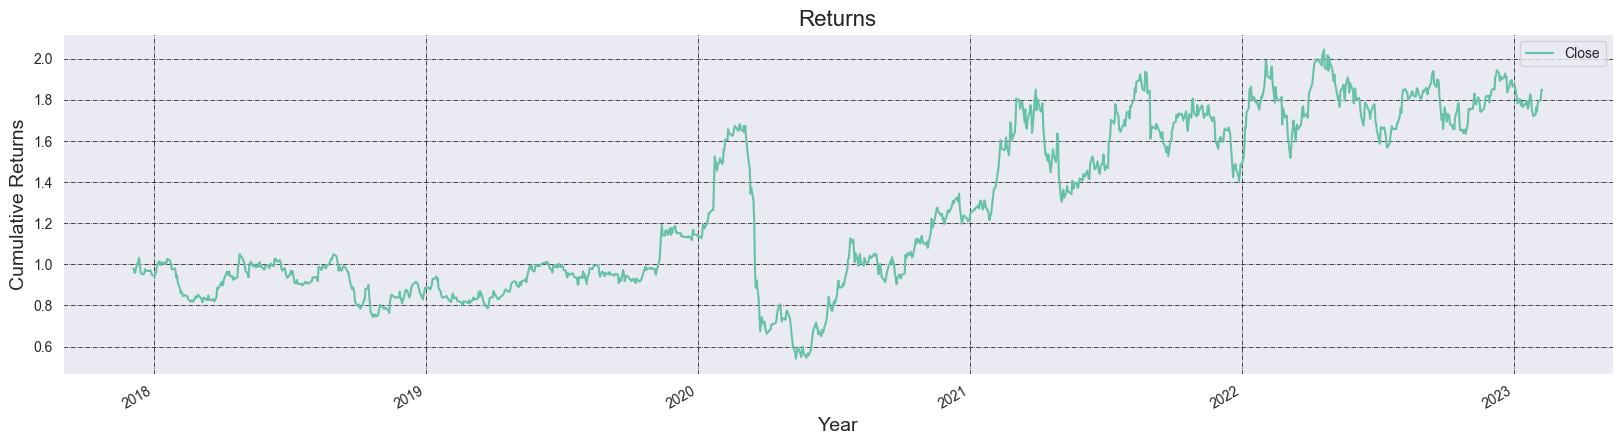

In [642]:
import matplotlib.pyplot as plt
# Plot all the close prices
((data['Close'].pct_change()+1).cumprod()).plot(figsize=(20, 5))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

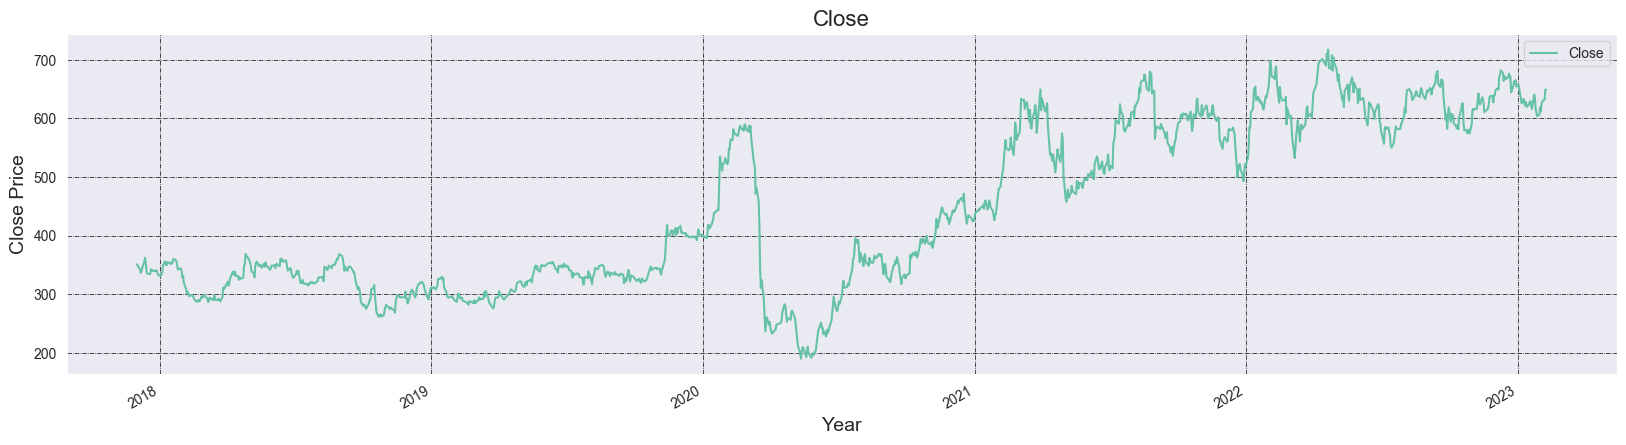

In [643]:
df = data.copy()
df[['Close']].plot(figsize=(20, 5))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Close", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [644]:
# https://www.datacamp.com/workspace/templates/recipe-python-time-series-shifts

df_time = data.copy()
df_time.reset_index(inplace=True)
var_col = "Close"

# Use this line to specify the size of the window you wish to use
window = 80  # Specify your chosen window here

# Create a column with a moving average using the window specified above
df_time["moving_average"] = df_time[var_col].rolling(window).mean()
df_time["moving_average_2"] = df_time[var_col].rolling(window*2).mean()
df_time["moving_average_3"] = df_time[var_col].rolling(window*4).mean()
df_time["moving_average_4"] = df_time[var_col].rolling(window*8).mean()
df_time["moving_average_5"] = df_time[var_col].rolling(window*16).mean()

# Create a column with an expanding average over all previous rows
df_time["expanding_average"] = df_time[var_col].expanding().mean()

# Select relevant columns and melt the DataFrame
# df_window = df_time[["Date", var_col, "moving_average", "expanding_average"]].\
# 	melt(id_vars="Date", var_name="period", value_name="price")

df_window = df_time[["Date", var_col, "moving_average", "moving_average_2", "moving_average_3", "moving_average_4", "moving_average_5", "expanding_average"]].\
	melt(id_vars="Date", var_name="period", value_name="price")

# Drop null values
df_window.dropna(inplace=True)

# Preview the DataFrame
df_window

,Date,period,price
0,2017-12-01 00:00:00+05:30,Close,351.049988
1,2017-12-04 00:00:00+05:30,Close,343.825012
2,2017-12-05 00:00:00+05:30,Close,342.299988
3,2017-12-06 00:00:00+05:30,Close,336.424988
4,2017-12-07 00:00:00+05:30,Close,338.799988
...,...,...,...
8976,2023-02-02 00:00:00+05:30,expanding_average,444.148299
8977,2023-02-03 00:00:00+05:30,expanding_average,444.292832
8978,2023-02-06 00:00:00+05:30,expanding_average,444.439403
8979,2023-02-07 00:00:00+05:30,expanding_average,444.598966


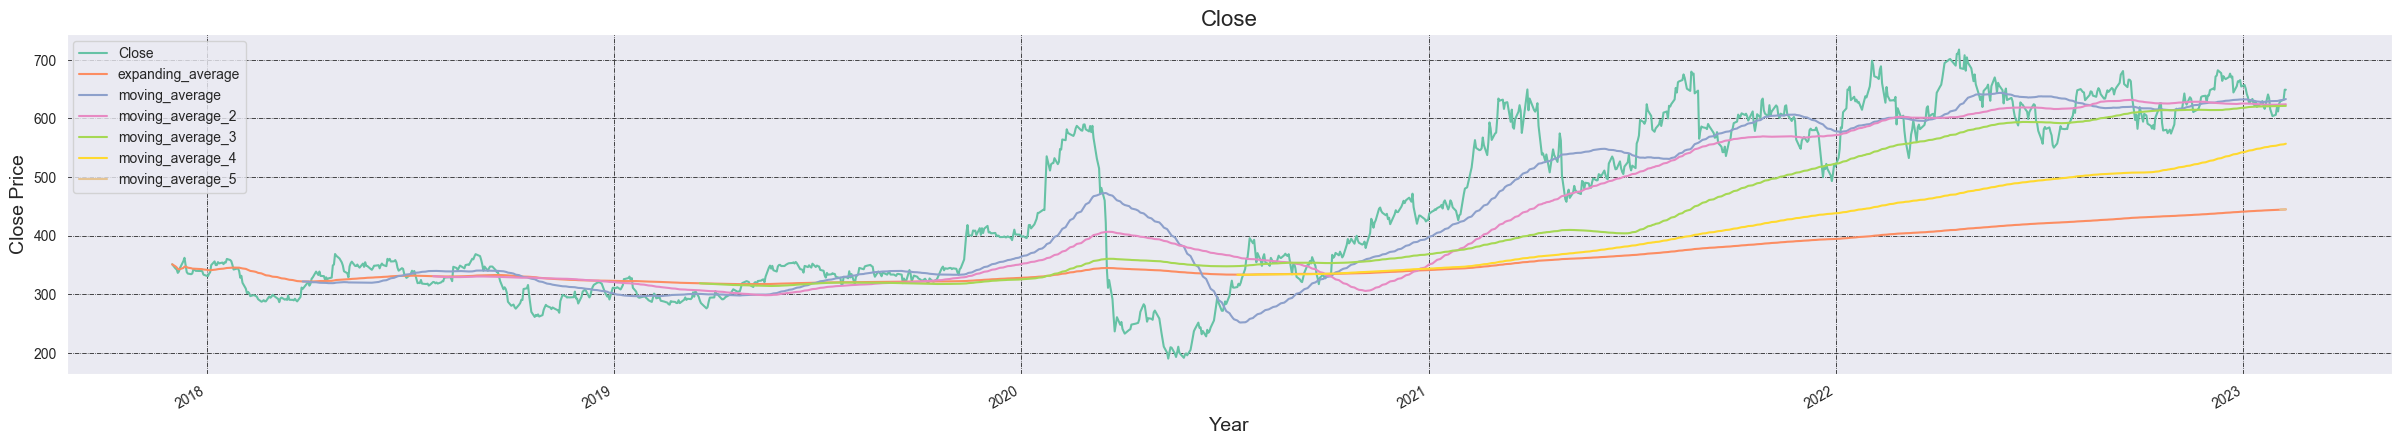

In [645]:
output = pd.pivot_table(data=df_window, 
                        index=['Date'], 
                        columns=['period'], 
                        values='price',
                        aggfunc='mean')
output.plot(figsize=(30, 5))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Close", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

<BarContainer object of 1283 artists>

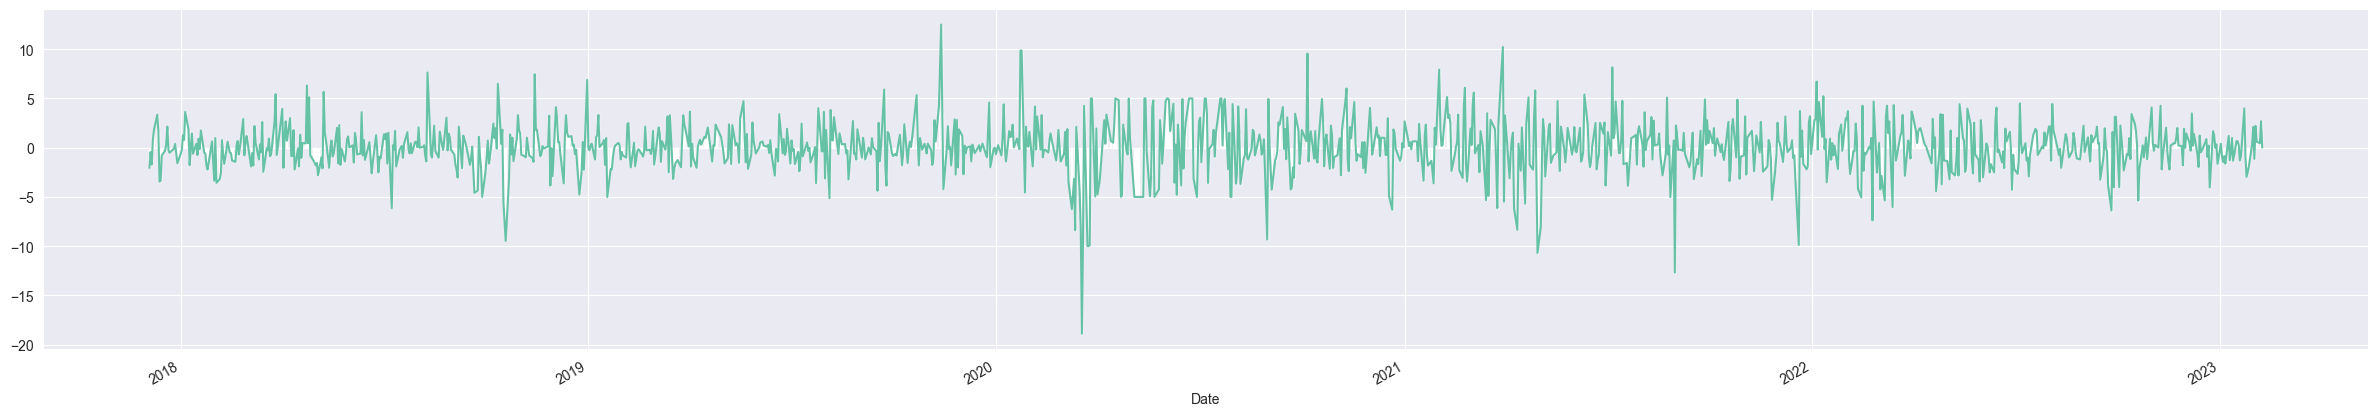

In [646]:
daily = data.copy()

daily['percent_change'] = daily['Close'].pct_change()*100
daily['percent_change'].plot(figsize=(30, 5)).bar(daily.index, daily['percent_change'])


In [647]:
daily

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2017-12-01 00:00:00+05:30,349.850006,356.500000,345.500000,351.049988,350.080078,539830,NaN
2017-12-04 00:00:00+05:30,353.924988,354.899994,335.149994,343.825012,342.875061,423594,-2.058104
2017-12-05 00:00:00+05:30,343.825012,345.000000,340.000000,342.299988,341.354248,314036,-0.443547
2017-12-06 00:00:00+05:30,342.299988,344.975006,335.049988,336.424988,335.495483,491036,-1.716331
2017-12-07 00:00:00+05:30,338.000000,341.924988,335.024994,338.799988,337.863953,227726,0.705952
...,...,...,...,...,...,...,...
2023-02-02 00:00:00+05:30,610.000000,627.549988,607.000000,625.349976,625.349976,894783,2.206423
2023-02-03 00:00:00+05:30,628.000000,631.250000,615.000000,629.150024,629.150024,611768,0.607668
2023-02-06 00:00:00+05:30,629.250000,640.700012,627.000000,632.049988,632.049988,668139,0.460934


<BarContainer object of 272 artists>

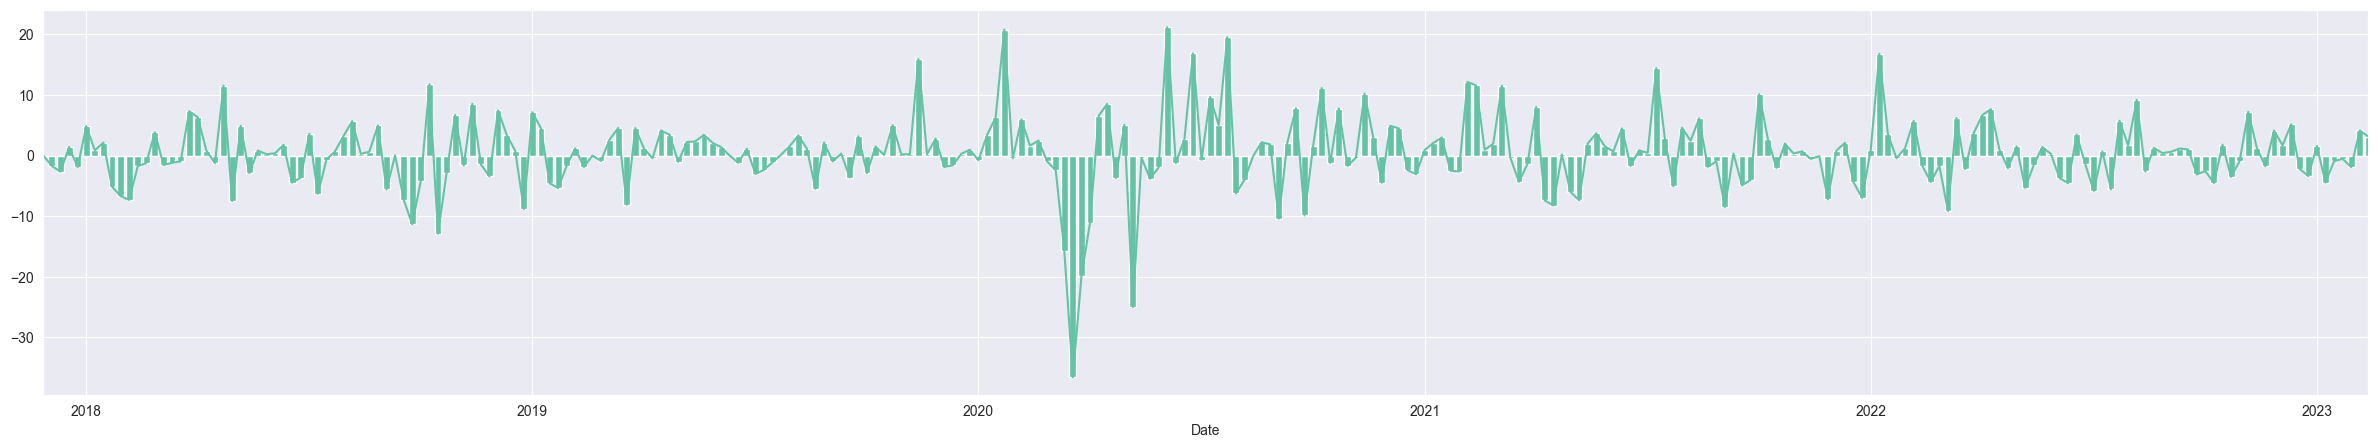

In [648]:
weekly = data.copy()

weekly['percent_change'] = weekly['Close'].pct_change()*100
weekly = weekly.resample('W').sum()

# # weekly = weekly.resample('W').mean()[:]
# weekly = weekly.resample('W').median()
# weekly['change'] = weekly['Close'].pct_change()*100

weekly['percent_change'].plot(figsize=(30, 5)).bar(weekly.index, weekly['percent_change'])

In [649]:
weekly.tail(10)

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2022-12-11 00:00:00+05:30,3298.750000,3359.699951,3285.099976,3327.000061,3327.000061,10892636,5.151755
2022-12-18 00:00:00+05:30,3365.600037,3395.850037,3321.949951,3349.599976,3349.599976,6067699,-2.207535
2022-12-25 00:00:00+05:30,3351.549988,3391.350037,3299.549988,3332.899963,3332.899963,7536925,-3.376019
2023-01-01 00:00:00+05:30,3292.150024,3337.700012,3253.850037,3301.450012,3301.450012,5654720,1.599046
2023-01-08 00:00:00+05:30,3244.650024,3264.650024,3186.600037,3211.549927,3211.549927,7739610,-4.443971
2023-01-15 00:00:00+05:30,3149.400024,3158.950073,3096.500000,3128.350037,3128.350037,5545740,-0.941406
2023-01-22 00:00:00+05:30,3135.000000,3152.150024,3097.600037,3119.099976,3119.099976,4423512,-0.533661
2023-01-29 00:00:00+05:30,2511.199951,2549.100037,2458.450012,2495.450073,2495.450073,6533043,-1.886536
2023-02-05 00:00:00+05:30,3073.400024,3129.450012,3025.799988,3091.500000,3091.500000,4949925,4.142391


In [650]:
monthly = data.copy()

monthly.drop(monthly.iloc[:,0:3], axis = 1, inplace = True)
monthly.drop(monthly.iloc[:,1:3], axis = 1, inplace = True)


monthly['percent_change'] = monthly['Close'].pct_change()*100
monthly = monthly.resample('M').sum()

# monthly = monthly.resample('M').agg(lambda x: x[-1])
# monthly['change'] = monthly['Close'].pct_change()*100

monthly.tail(10)

,Close,percent_change
Date,,
2022-05-31 00:00:00+05:30,13661.574951,-9.913127
2022-06-30 00:00:00+05:30,13591.400085,-5.130598
2022-07-31 00:00:00+05:30,12083.800049,0.356740
2022-08-31 00:00:00+05:30,12750.400024,7.069053
2022-09-30 00:00:00+05:30,14182.850037,-1.706700
2022-10-31 00:00:00+05:30,11278.949890,-4.430718
2022-11-30 00:00:00+05:30,13126.149902,8.417566
2022-12-31 00:00:00+05:30,14598.500000,2.583079
2023-01-31 00:00:00+05:30,13179.600037,-5.338147


<BarContainer object of 63 artists>

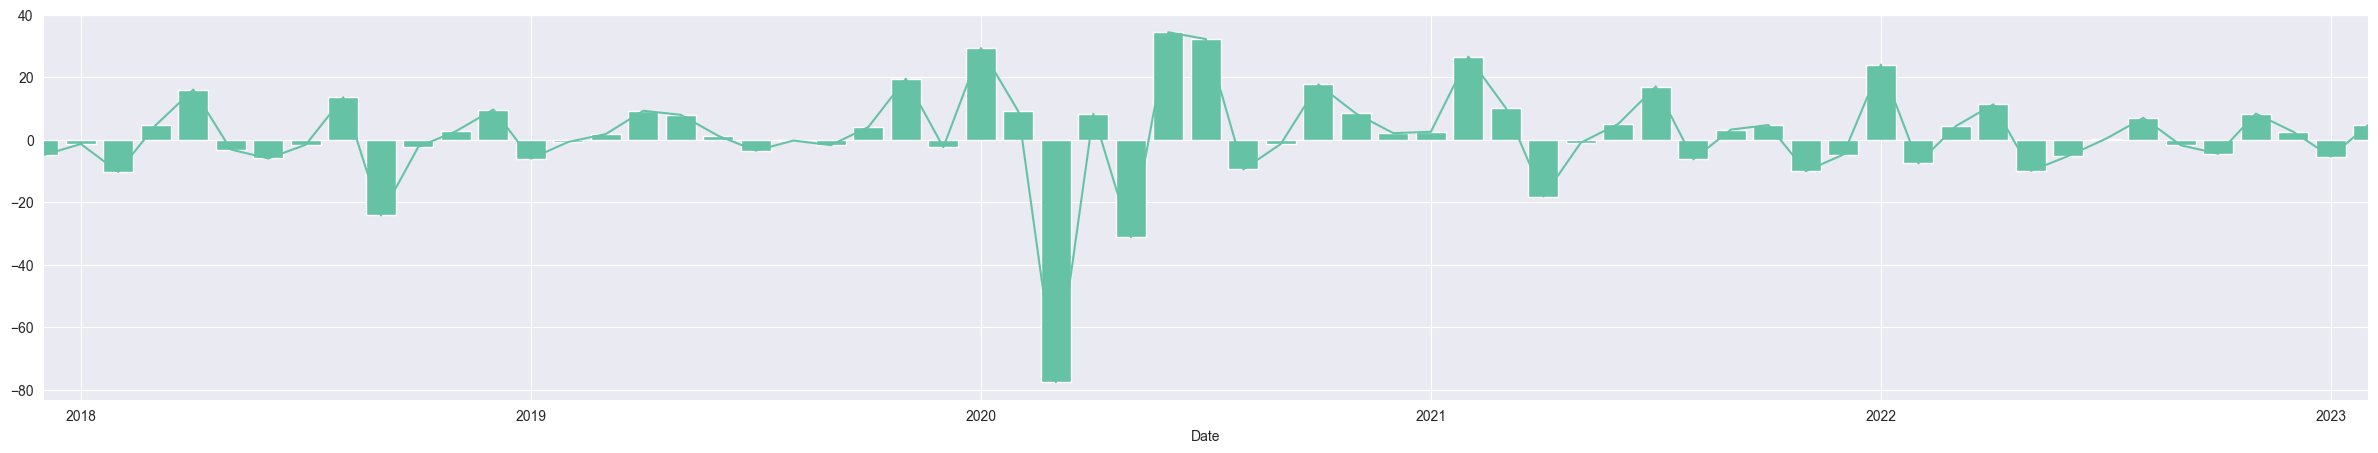

In [651]:

monthly['percent_change'].plot(figsize=(30, 5)).bar(monthly.index, monthly['percent_change'])

<BarContainer object of 7 artists>

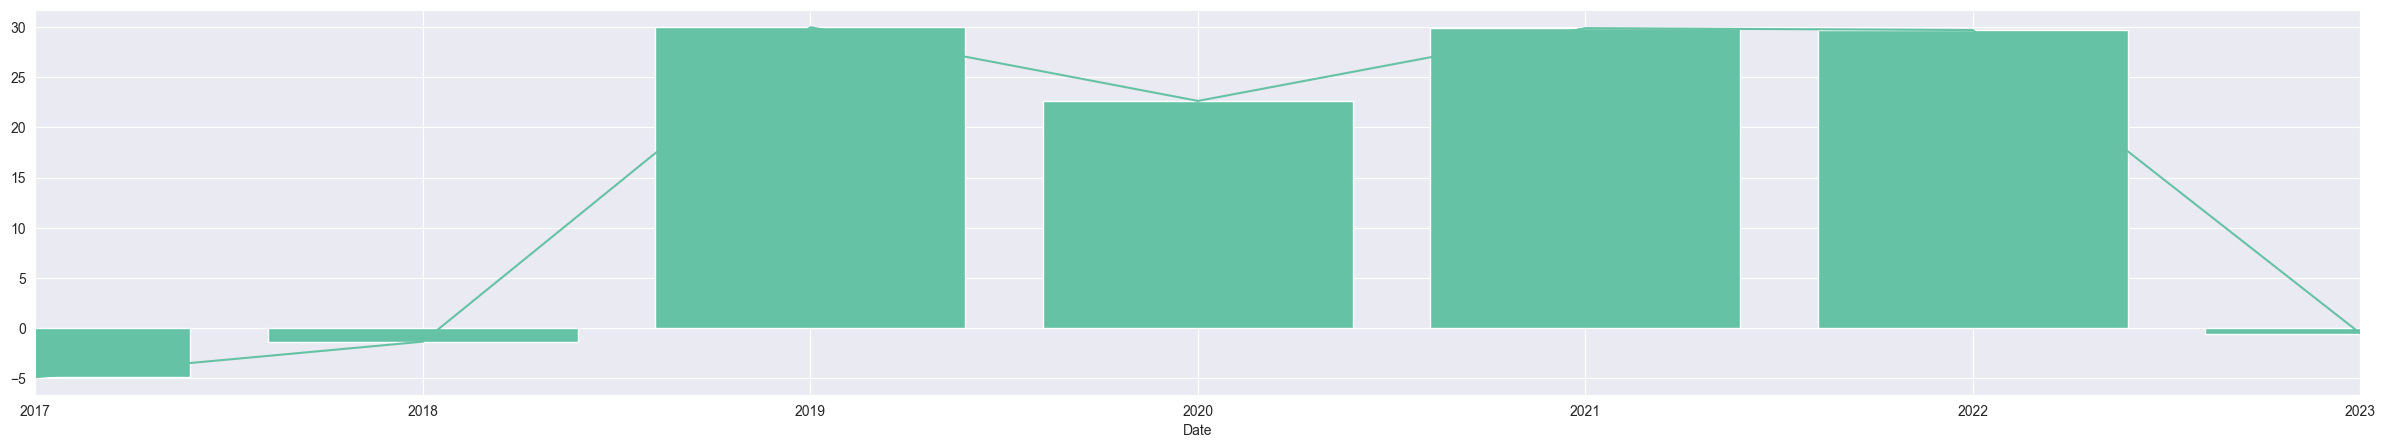

In [652]:
annual = data.copy()

annual['percent_change'] = annual['Close'].pct_change()*100
annual = annual.resample('Y').sum()
# annual['change'] = annual['Close'].pct_change()*100
annual['percent_change'].plot(figsize=(30, 5)).bar(annual.index, annual['percent_change'])

In [653]:
def change_period(df, period=150):
    
    var_col = "Close"
    df_time = df.copy()


    # Use this line to specify the rate of change you want to calculate
    pct_return_periods = -period

    # Create a column with the percentage increase and multiply by 100
    df_time["percent_change"] = (
        df_time[var_col].pct_change(periods=pct_return_periods).mul(100)
    )

    # Select relevant columns and drop null values
    # df_pct = df_time[["Date", "percent_change"]].dropna()

    # # Preview the DataFrame
    # df_pct

    return df_time

,Open,High,Low,Close,Adj Close,Volume,percent_change
Date,,,,,,,
2017-12-01 00:00:00+05:30,349.850006,356.500000,345.500000,351.049988,350.080078,539830,18.208597
2017-12-04 00:00:00+05:30,353.924988,354.899994,335.149994,343.825012,342.875061,423594,16.422585
2017-12-05 00:00:00+05:30,343.825012,345.000000,340.000000,342.299988,341.354248,314036,17.427097
2017-12-06 00:00:00+05:30,342.299988,344.975006,335.049988,336.424988,335.495483,491036,17.098852
2017-12-07 00:00:00+05:30,338.000000,341.924988,335.024994,338.799988,337.863953,227726,17.649095
...,...,...,...,...,...,...,...
2023-02-02 00:00:00+05:30,610.000000,627.549988,607.000000,625.349976,625.349976,894783,NaN
2023-02-03 00:00:00+05:30,628.000000,631.250000,615.000000,629.150024,629.150024,611768,NaN
2023-02-06 00:00:00+05:30,629.250000,640.700012,627.000000,632.049988,632.049988,668139,NaN


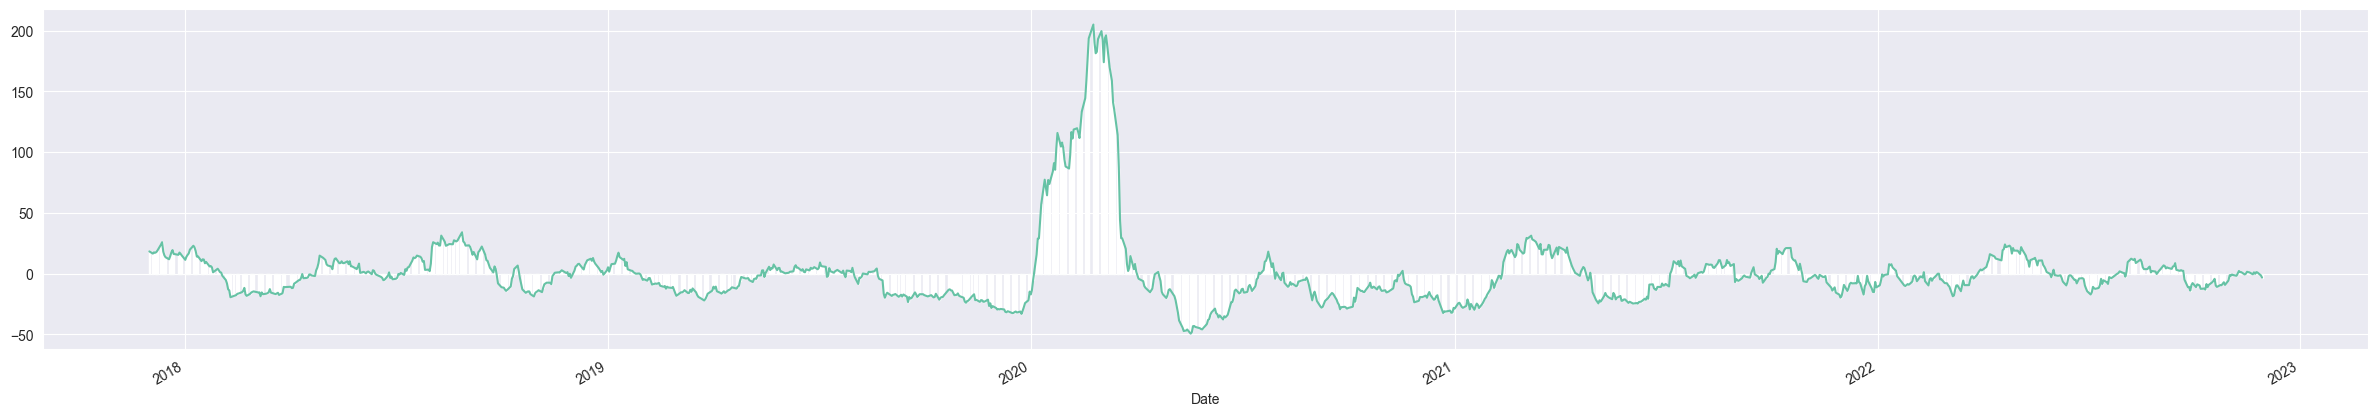

In [654]:
df = change_period(data, 50)

df['percent_change'].plot(figsize=(30, 5)).bar(df.index, df['percent_change'])

df

-2.307440148561185

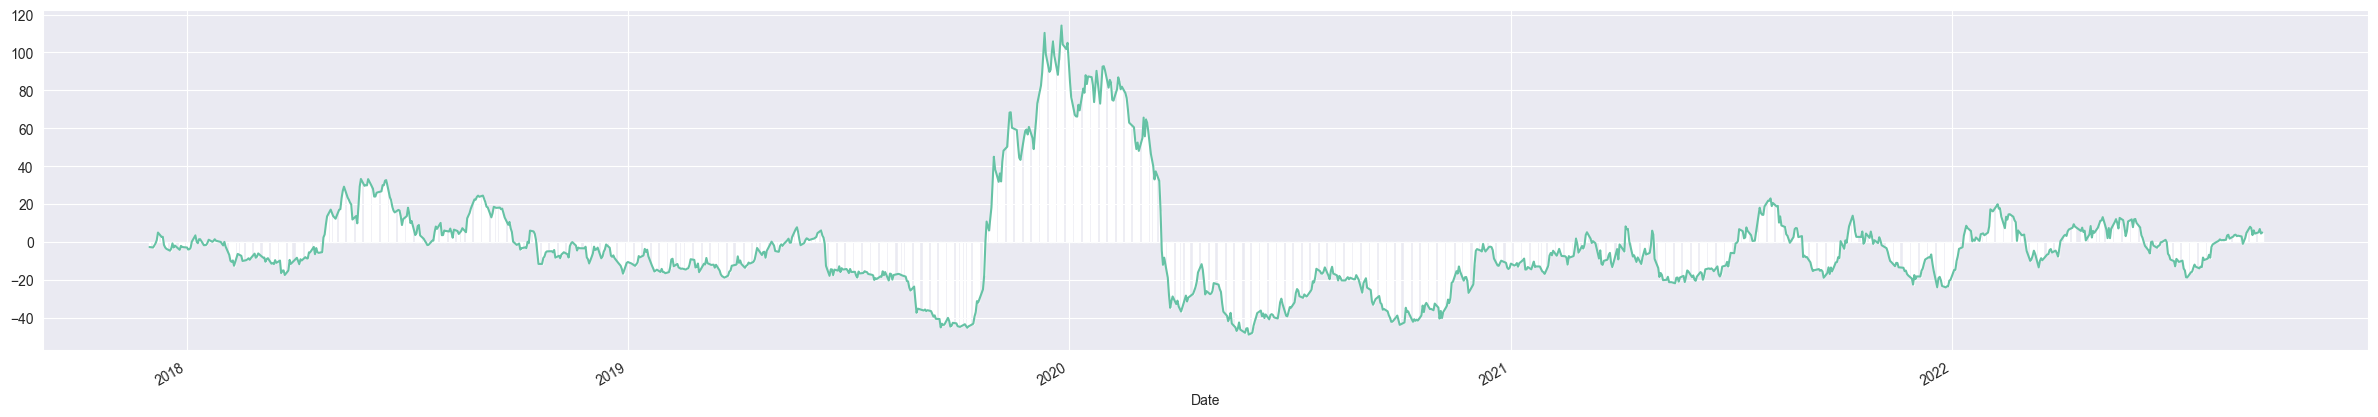

In [655]:
df = change_period(data, 100)

df['percent_change'].plot(figsize=(30, 5)).bar(df.index, df['percent_change'])

df['percent_change'].mean()

-4.830870932300956

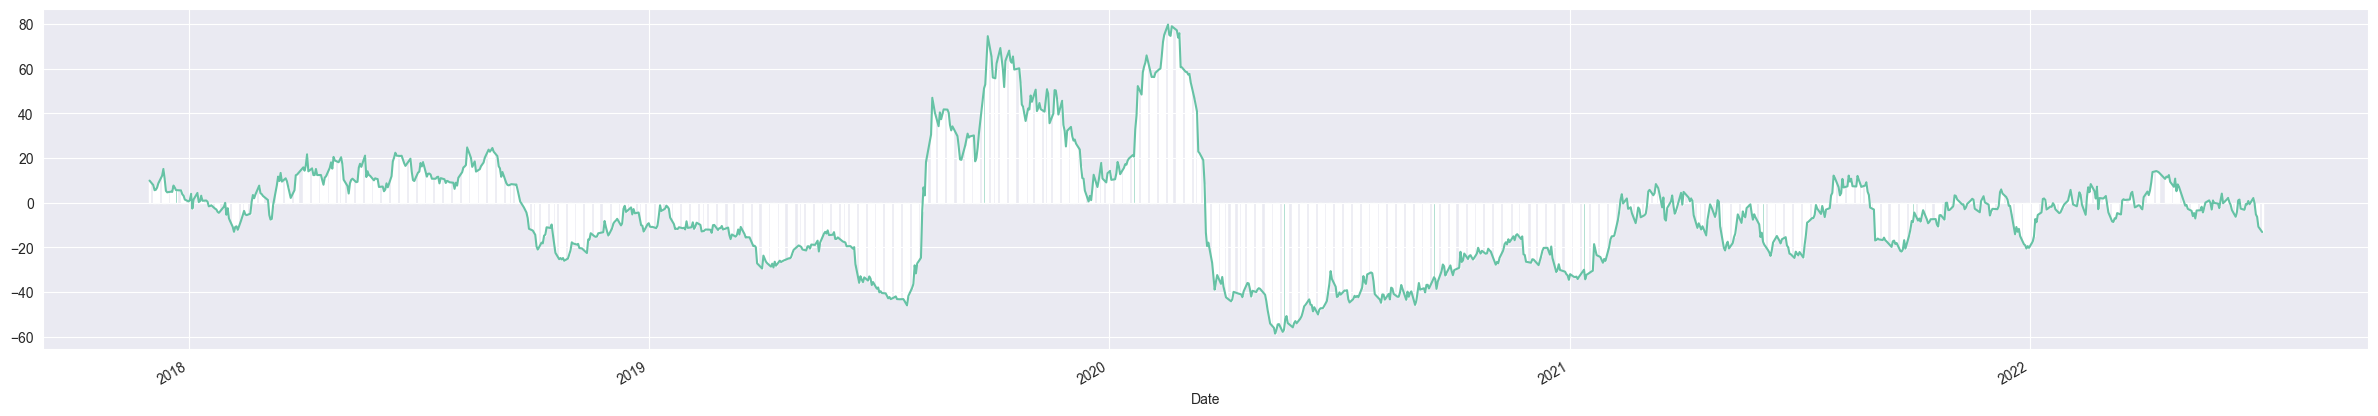

In [656]:
df = change_period(data, 150)

df['percent_change'].plot(figsize=(30, 5)).bar(df.index, df['percent_change'])

df['percent_change'].mean()

-7.319140498250438

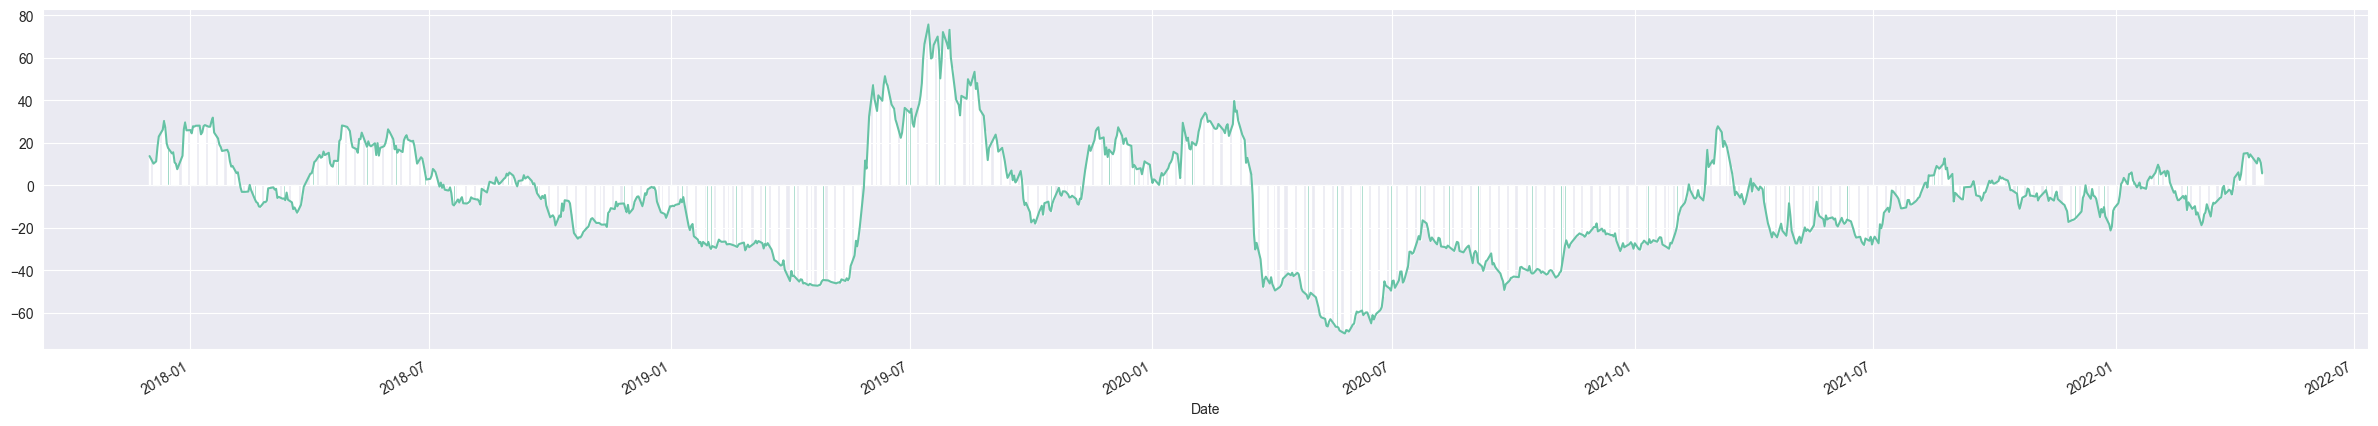

In [657]:
df = change_period(data, 200)

df['percent_change'].plot(figsize=(30, 5)).bar(df.index, df['percent_change'])

df['percent_change'].mean()

-11.593795618382394

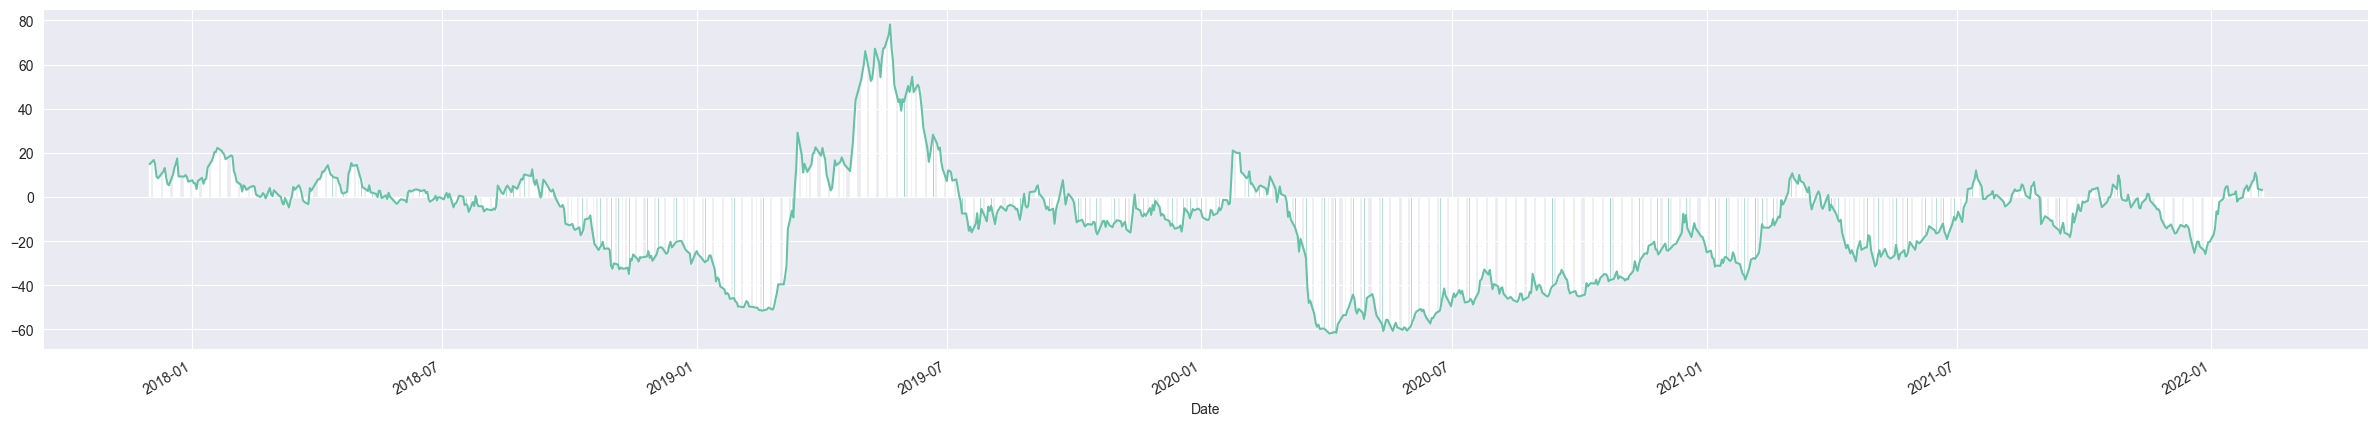

In [658]:
df = change_period(data, 250)

df['percent_change'].plot(figsize=(30, 5)).bar(df.index, df['percent_change'])

df['percent_change'].mean()

-14.948036091590422

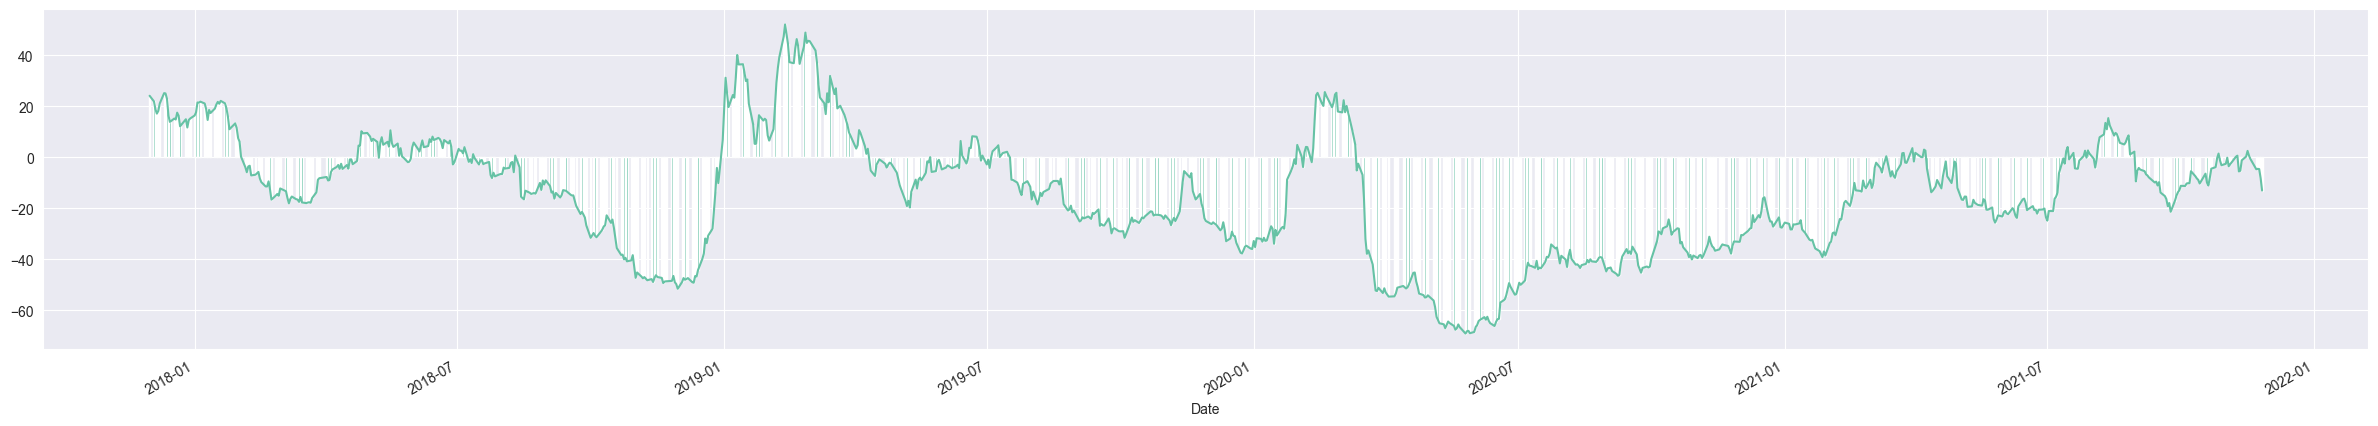

In [659]:
df = change_period(data, 300)

df['percent_change'].plot(figsize=(30, 5)).bar(df.index, df['percent_change'])

df['percent_change'].mean()

In [660]:
df = data.copy()

df['Year']=df.index.strftime('%Y')
df['Month']=df.index.strftime('%m')
df['Day']=df.index.strftime('%w')
df['percent_change'] = df['Close'].pct_change()*100

df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,percent_change
Date,,,,,,,,,,
2017-12-01 00:00:00+05:30,349.850006,356.500000,345.500000,351.049988,350.080078,539830,2017,12,5,NaN
2017-12-04 00:00:00+05:30,353.924988,354.899994,335.149994,343.825012,342.875061,423594,2017,12,1,-2.058104
2017-12-05 00:00:00+05:30,343.825012,345.000000,340.000000,342.299988,341.354248,314036,2017,12,2,-0.443547
2017-12-06 00:00:00+05:30,342.299988,344.975006,335.049988,336.424988,335.495483,491036,2017,12,3,-1.716331
2017-12-07 00:00:00+05:30,338.000000,341.924988,335.024994,338.799988,337.863953,227726,2017,12,4,0.705952
...,...,...,...,...,...,...,...,...,...,...
2023-02-02 00:00:00+05:30,610.000000,627.549988,607.000000,625.349976,625.349976,894783,2023,02,4,2.206423
2023-02-03 00:00:00+05:30,628.000000,631.250000,615.000000,629.150024,629.150024,611768,2023,02,5,0.607668
2023-02-06 00:00:00+05:30,629.250000,640.700012,627.000000,632.049988,632.049988,668139,2023,02,1,0.460934


In [661]:
output = pd.pivot_table(data=df, 
                        index=['Month'], 
                        columns=['Year'], 
                        values='percent_change',
                        aggfunc='sum')

output

Year,2017,2018,2019,2020,2021,2022,2023
Month,,,,,,,
01,NaN,-1.293172,-5.983305,29.394094,2.601352,24.106163,-5.338147
02,NaN,-10.237392,-0.643060,9.121614,26.633742,-7.482630,4.817651
03,NaN,4.772243,1.892247,-77.558754,10.212271,4.429919,NaN
04,NaN,16.121156,9.350540,8.357591,-18.144772,11.392569,NaN
05,NaN,-3.070332,8.025290,-31.133407,-0.875129,-9.913127,NaN
06,NaN,-5.932402,1.302167,34.478219,5.148417,-5.130598,NaN
07,NaN,-1.519586,-3.430115,32.280182,17.091081,0.356740,NaN
08,NaN,13.670025,-0.205855,-9.425789,-6.192421,7.069053,NaN
09,NaN,-24.150276,-1.680069,-1.272344,3.295084,-1.706700,NaN


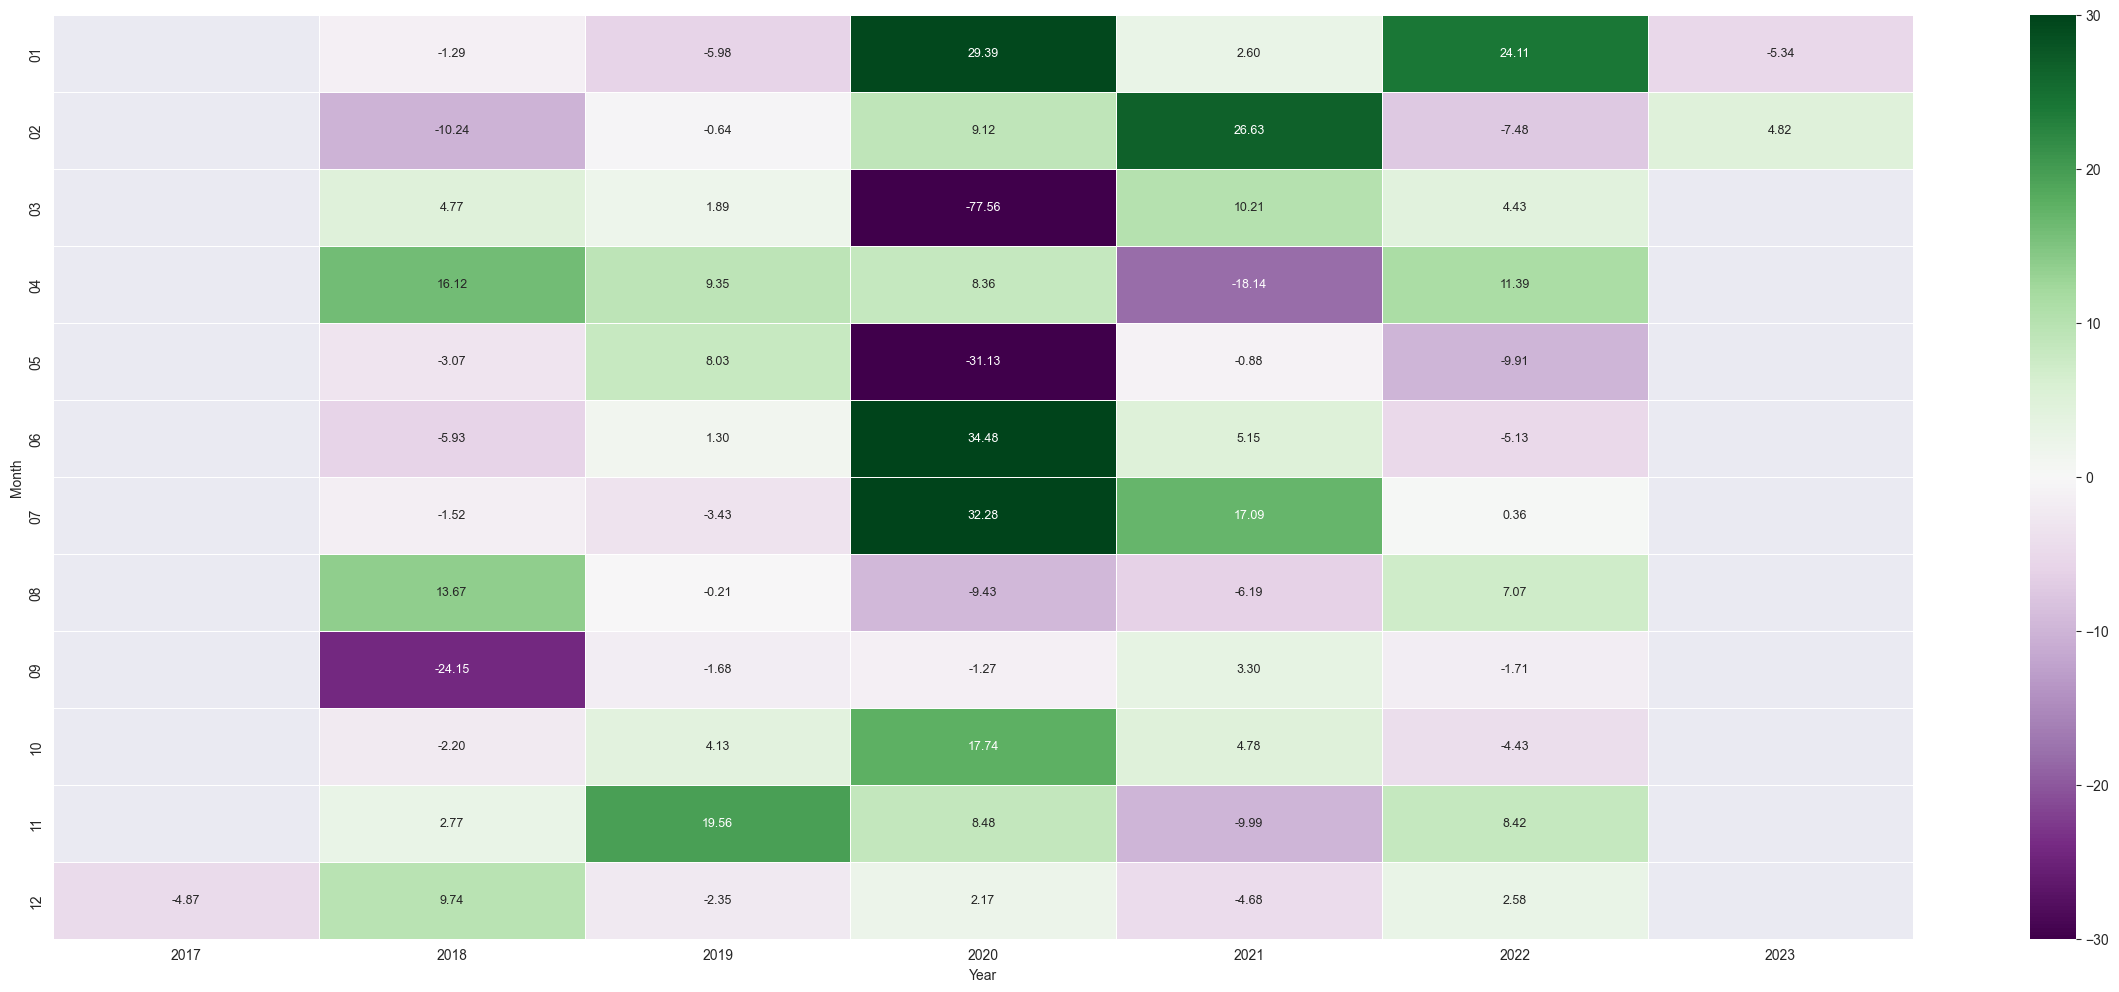

In [662]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 12)
# ax = sns.heatmap(output, ax=ax, annot=True, annot_kws={"size": 9}, fmt="0.2f", cmap='RdYlGn', linewidths=0.5, vmin=-40, vmax=40)
ax = sns.heatmap(output, ax=ax, annot=True, annot_kws={"size": 9}, fmt="0.2f", cmap='PRGn', linewidths=0.5, vmin=-30, vmax=30)


<AxesSubplot: xlabel='Year'>

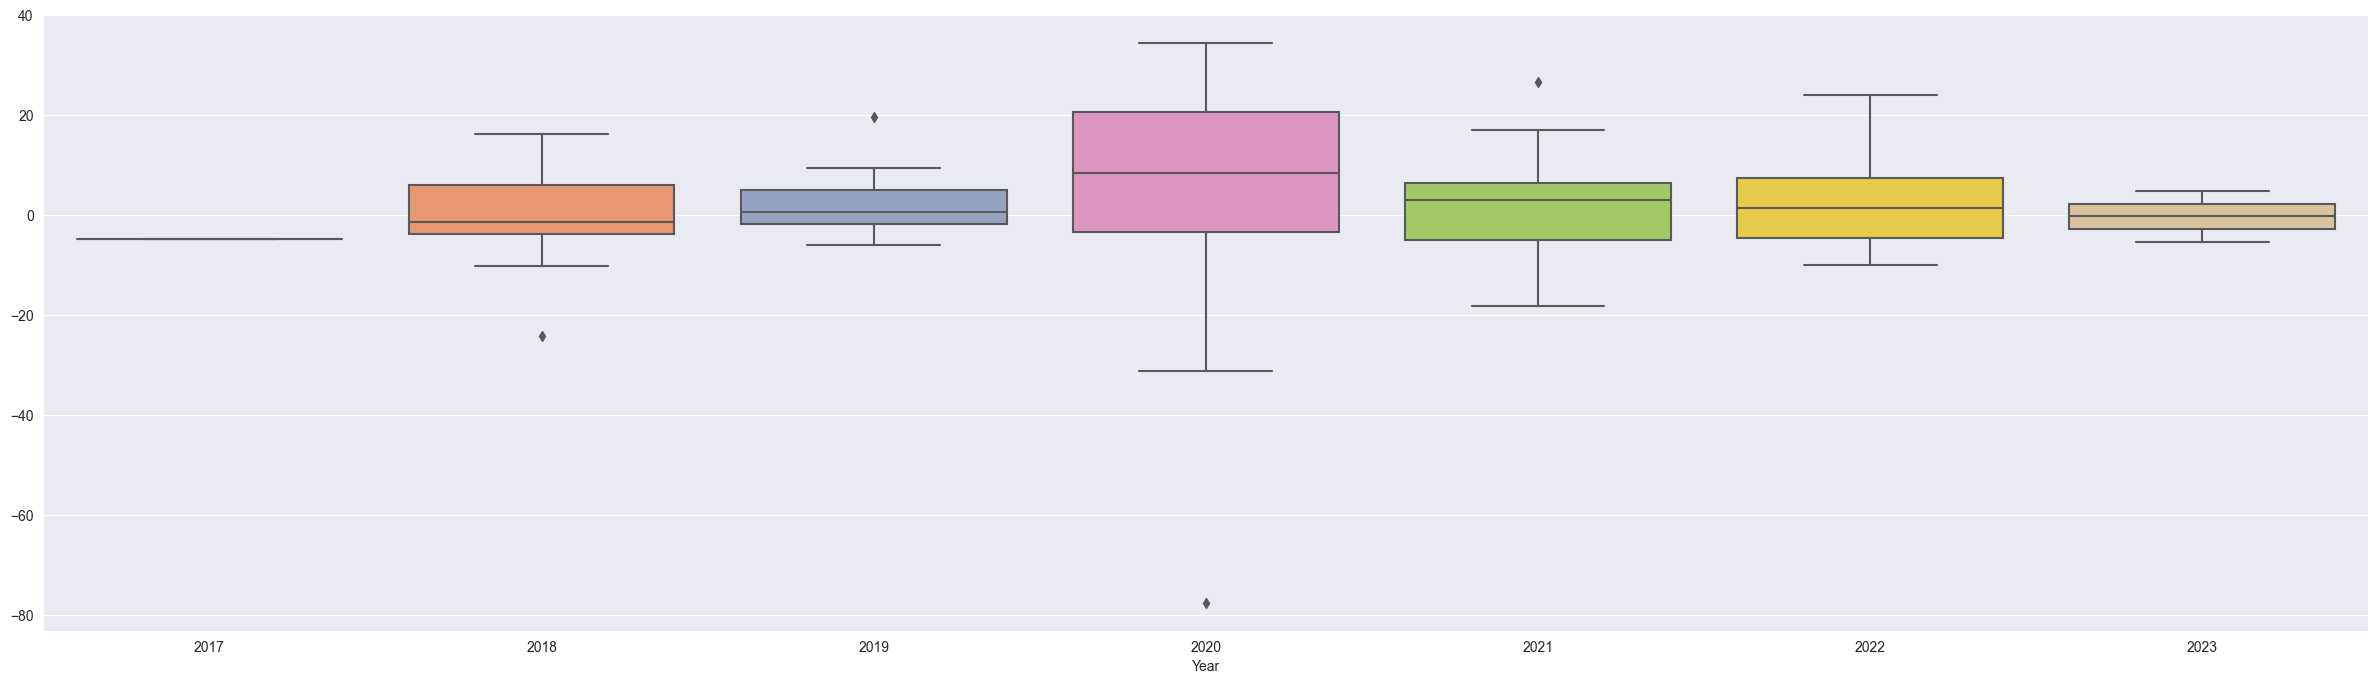

In [663]:
plt.figure(figsize=(30,8))
# sns.set_style("whitegrid")

sns.set_style('darkgrid')
sns.set_palette('Set2')
  
sns.boxplot(data = output)

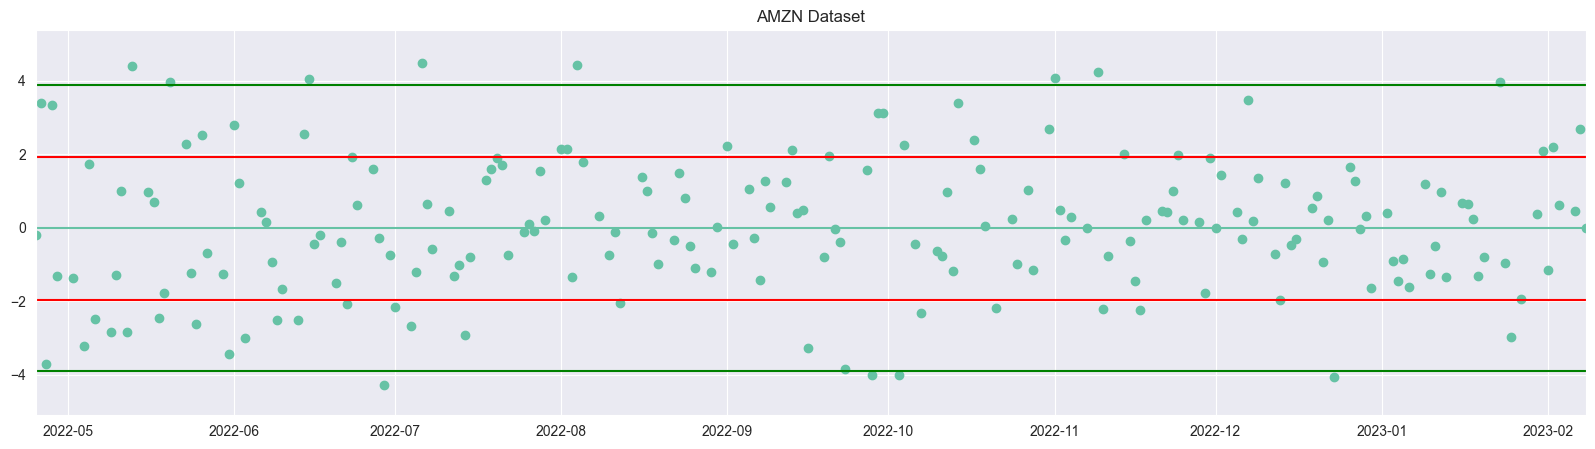

In [664]:
# weekly['change'].plot(kind='hist')
df1 = daily.copy()
# annual.plot.scatter(x='Volume', y='change')

df1.reset_index(inplace = True)

df1 = df1[1:]
df1 = df1.tail(200)

change = df1['percent_change']
mean = change.mean()
std = change.std()
min_value = min(change)
max_value = max(change)

# # df.plot.scatter(x='Date', y='change')

plt.figure(figsize=(20, 5))
plt.title("AMZN Dataset")
plt.ylim(min_value - min_value*0.2, max_value + max_value*0.2)
plt.xlim(min(df1['Date']), max(df1['Date']))
plt.scatter(x=df1['Date'], y=df1['percent_change'])

plt.hlines(y=mean, xmin=min(df1['Date']), xmax=max(df1['Date']))

plt.hlines(y=mean - std, xmin=min(df1['Date']), xmax=max(df1['Date']), colors='r')
plt.hlines(y=mean + std, xmin=min(df1['Date']), xmax=max(df1['Date']), colors='r')
plt.hlines(y=mean - 2*std, xmin=min(df1['Date']), xmax=max(df1['Date']), colors='g')
plt.hlines(y=mean + 2*std, xmin=min(df1['Date']), xmax=max(df1['Date']), colors='g')

plt.show()

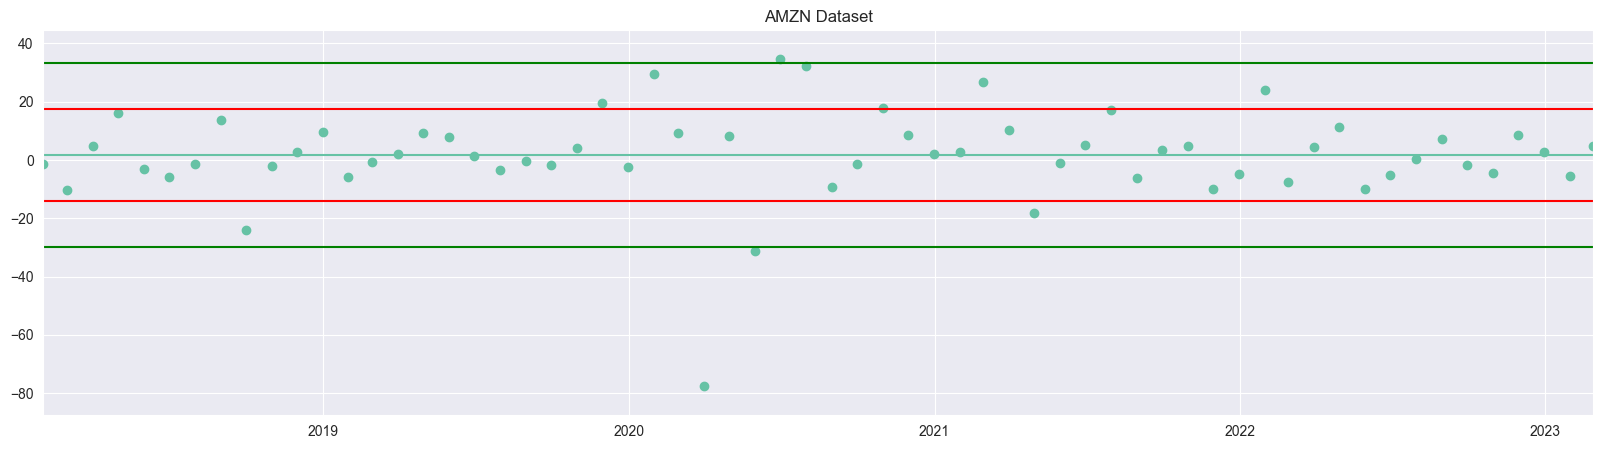

In [665]:
# https://codefather.tech/blog/pandas-standard-deviation/

# weekly['change'].plot(kind='hist')
df1 = monthly.copy()
# annual.plot.scatter(x='Volume', y='change')

df1.reset_index(inplace = True)

df1 = df1[1:]
df1

change = df1['percent_change']
mean = change.mean()
std = change.std()
min_value = min(change)
max_value = max(change)

# # df.plot.scatter(x='Date', y='change')

plt.figure(figsize=(20, 5))
plt.title("AMZN Dataset")
plt.ylim(min_value - 10, max_value + 10)
plt.xlim(min(df1['Date']), max(df1['Date']))
plt.scatter(x=df1['Date'], y=df1['percent_change'])

plt.hlines(y=mean, xmin=min(df1['Date']), xmax=max(df1['Date']))

plt.hlines(y=mean - std, xmin=min(df1['Date']), xmax=max(df1['Date']), colors='r')
plt.hlines(y=mean + std, xmin=min(df1['Date']), xmax=max(df1['Date']), colors='r')
plt.hlines(y=mean - 2*std, xmin=min(df1['Date']), xmax=max(df1['Date']), colors='g')
plt.hlines(y=mean + 2*std, xmin=min(df1['Date']), xmax=max(df1['Date']), colors='g')

plt.show()



<AxesSubplot: ylabel='Frequency'>

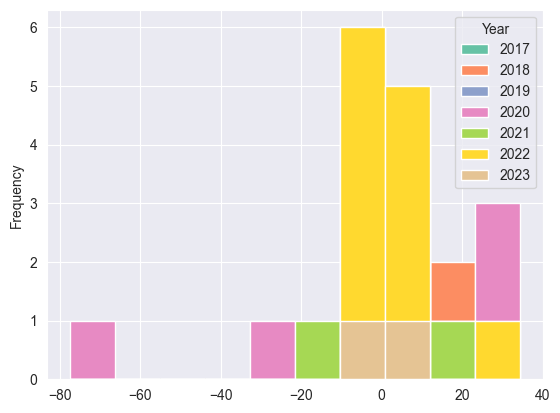

In [666]:
output.plot(kind='hist')

In [667]:
def my_cum_sum(df, value = 30, y_field = 'Yeild'):
    sum = 0
    field = 'Change'

    df[y_field] = np.nan
    # df['close'] = df['close'].fillna(0)
    df[field] = df[field].replace(np.nan, 0)

    for i in range(len(df)):
        sum = 0 #df.loc[i, 'close']
        length = 0

        for j in range(i+1, len(df)):
            v = df.loc[j, field]
            sum = sum + v
            length = length + 1

            if sum >= value:
                df[y_field].values[i] = length
                break

    # df[y_field] = df[y_field].replace(np.nan, -500)

In [668]:
def my_cum_sum1(df):
    my_cum_sum(df, value=10, y_field = 'y_10')
    my_cum_sum(df, value=15, y_field = 'y_15')
    my_cum_sum(df, value=20, y_field = 'y_20')
    my_cum_sum(df, value=25, y_field = 'y_25')
    my_cum_sum(df, value=30, y_field = 'y_30')

In [669]:
example = [np.nan,5,5,10,10,10,5,5,5]
example_df = pd.DataFrame(example, columns=['Change'])

my_cum_sum(example_df)
example_df

,Change,Yeild
0,0.0,4.0
1,5.0,4.0
2,5.0,3.0
3,10.0,4.0
4,10.0,NaN
5,10.0,NaN
6,5.0,NaN
7,5.0,NaN
8,5.0,NaN


In [670]:
df = data.copy()

df = df.reset_index()

df['Change'] = df['Close'].pct_change(periods=1)*100

my_cum_sum1(df)

df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume,Change,y_10,y_15,y_20,y_25,y_30
Date,,,,,,,,,,,,
2017-12-01 00:00:00+05:30,349.850006,356.500000,345.500000,351.049988,350.080078,539830,0.000000,474.0,475.0,475.0,476.0,519.0
2017-12-04 00:00:00+05:30,353.924988,354.899994,335.149994,343.825012,342.875061,423594,-2.058104,371.0,474.0,474.0,474.0,516.0
2017-12-05 00:00:00+05:30,343.825012,345.000000,340.000000,342.299988,341.354248,314036,-0.443547,183.0,473.0,473.0,473.0,512.0
2017-12-06 00:00:00+05:30,342.299988,344.975006,335.049988,336.424988,335.495483,491036,-1.716331,95.0,471.0,472.0,472.0,473.0
2017-12-07 00:00:00+05:30,338.000000,341.924988,335.024994,338.799988,337.863953,227726,0.705952,94.0,471.0,471.0,471.0,472.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-02 00:00:00+05:30,610.000000,627.549988,607.000000,625.349976,625.349976,894783,2.206423,NaN,NaN,NaN,NaN,NaN
2023-02-03 00:00:00+05:30,628.000000,631.250000,615.000000,629.150024,629.150024,611768,0.607668,NaN,NaN,NaN,NaN,NaN
2023-02-06 00:00:00+05:30,629.250000,640.700012,627.000000,632.049988,632.049988,668139,0.460934,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Date'>

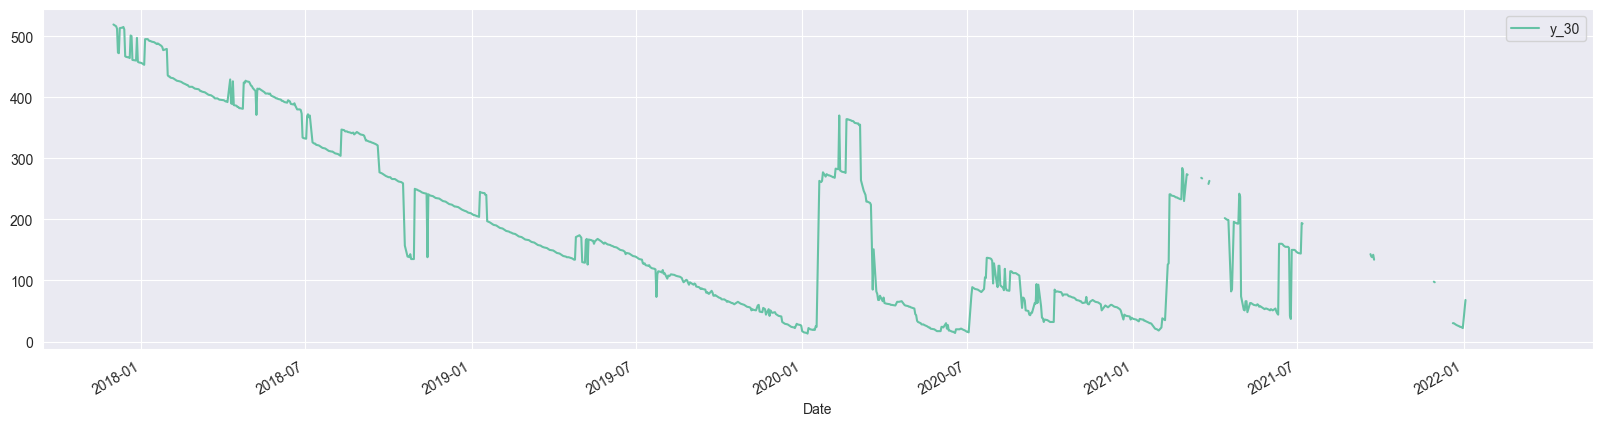

In [671]:
df.min()
# df.plot(y = ['y_10', 'y_15', 'y_20', 'y_25','y_30'], figsize=(20, 5))
df.plot(y = ['y_30'], figsize=(20, 5))

<AxesSubplot: >

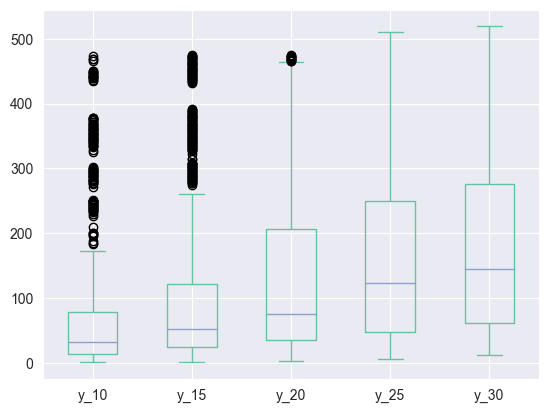

In [672]:
df[['y_10', 'y_15', 'y_20', 'y_25','y_30']].plot.box()

In [673]:
df = data.copy()

df = df.resample('W').mean()

df = df.reset_index()
df['Change'] = df['Close'].pct_change(periods=1)*100

my_cum_sum1(df)

df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume,Change,y_10,y_15,y_20,y_25,y_30
Date,,,,,,,,,,,,
2017-12-03 00:00:00+05:30,349.850006,356.500000,345.500000,351.049988,350.080078,5.398300e+05,0.000000,102.0,102.0,103.0,111.0,112.0
2017-12-10 00:00:00+05:30,343.409998,346.759998,336.744995,341.249994,340.307166,3.871144e+05,-2.791623,101.0,101.0,101.0,103.0,110.0
2017-12-17 00:00:00+05:30,352.785004,360.120001,340.914996,348.259998,347.297815,1.482903e+06,2.054214,100.0,100.0,100.0,109.0,110.0
2017-12-24 00:00:00+05:30,338.279999,343.760004,333.554999,338.730005,337.794147,3.471180e+05,-2.736459,99.0,99.0,99.0,100.0,108.0
2017-12-31 00:00:00+05:30,340.331253,342.562500,335.062492,338.174995,337.240677,1.982860e+05,-0.163850,76.0,98.0,98.0,99.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15 00:00:00+05:30,629.880005,631.790015,619.300000,625.670007,625.670007,1.109148e+06,-2.590646,NaN,NaN,NaN,NaN,NaN
2023-01-22 00:00:00+05:30,627.000000,630.430005,619.520007,623.819995,623.819995,8.847024e+05,-0.295685,NaN,NaN,NaN,NaN,NaN
2023-01-29 00:00:00+05:30,627.799988,637.275009,614.612503,623.862518,623.862518,1.633261e+06,0.006817,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Date'>

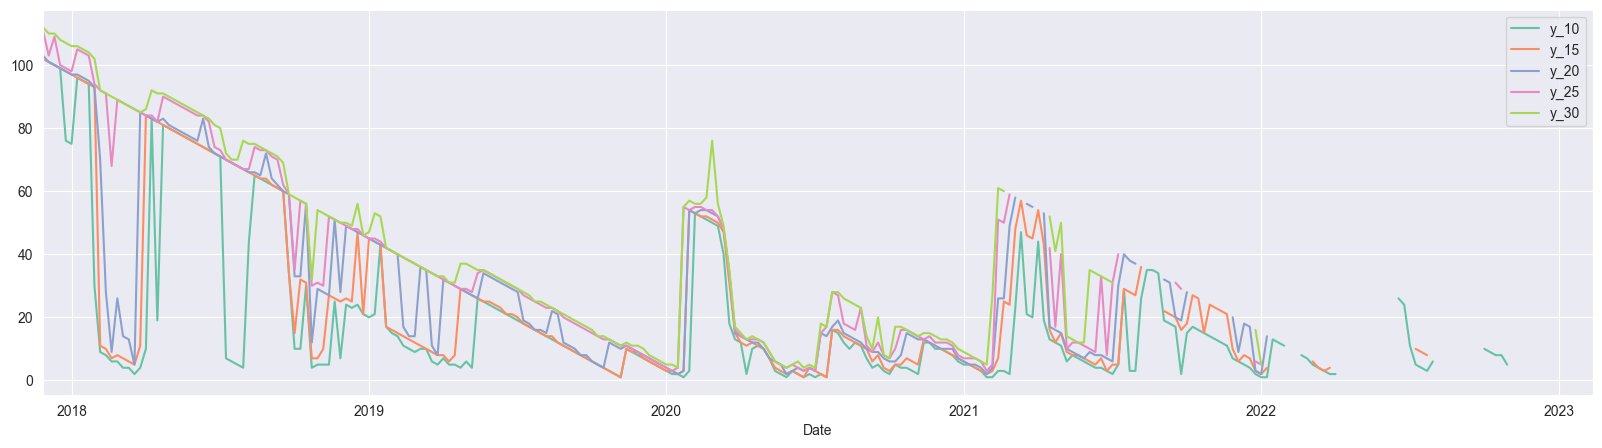

In [674]:
df.plot(y = ['y_10', 'y_15', 'y_20', 'y_25','y_30'], figsize=(20, 5))

<AxesSubplot: >

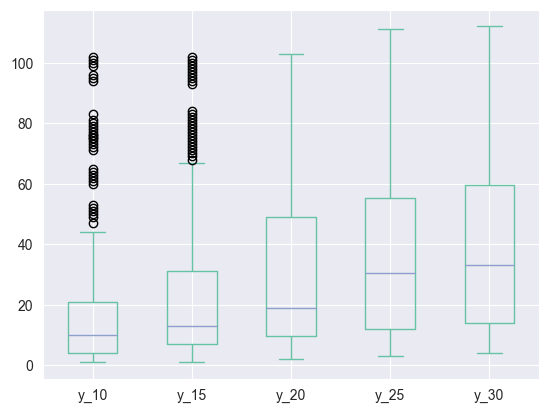

In [675]:
df[['y_10', 'y_15', 'y_20', 'y_25','y_30']].plot.box()

In [676]:
df = data.copy()

df = df.resample('MS').mean()

df = df.reset_index()
df['Change'] = df['Close'].pct_change(periods=1)*100

my_cum_sum1(df)

df = df.set_index('Date')


<AxesSubplot: xlabel='Date'>

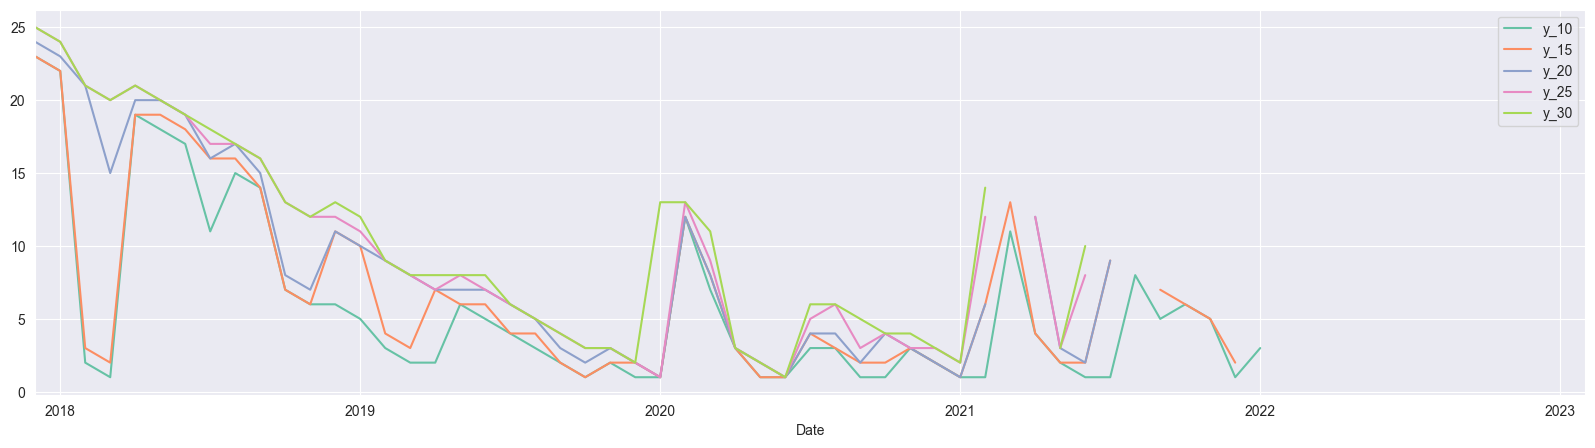

In [677]:
df.plot(y = ['y_10', 'y_15', 'y_20', 'y_25','y_30'], figsize=(20, 5))

<AxesSubplot: >

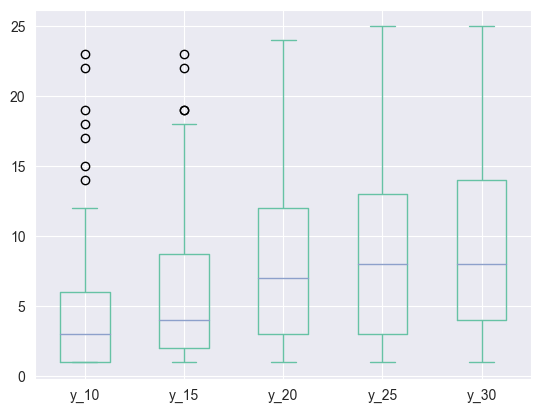

In [678]:
df[['y_10', 'y_15', 'y_20', 'y_25','y_30']].plot.box()